# 빅카인즈 웹크롤링

In [1]:
###검색키워드 설정###
keyword = '자살'
###################

In [10]:
!google-chrome --version

'google-chrome'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


In [2]:
import pandas as pd
path = './data/'
path2='C:/Users/COM/Desktop/'

In [3]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time
from selenium.common.exceptions import NoSuchElementException

driver=webdriver.Chrome('C:/chromedriver')
driver.get('https://www.bigkinds.or.kr/')
# driver.find_element_by_xpath('//*[@id="contents"]/div[3]/div/div[2]/div/div[2]/button').click()
driver.implicitly_wait(3)

n_data = []

### 로그인 과정

In [4]:
driver.find_element_by_xpath('//*[@id="app-top-navbar"]/ul/li[1]/a').click()
log_id = driver.find_element_by_id('login-user-id')
log_id.send_keys('webcrawl04@gmail.com')

log_pass = driver.find_element_by_id('login-user-password')
log_pass.send_keys('950628!!')
driver.find_element_by_id('login-btn').click()
time.sleep(1)

### 기간조정과정

In [5]:
driver.find_element_by_id('date-filter-btn').click()
begin_d = driver.find_element_by_id('search-begin-date')
begin_d.send_keys(Keys.HOME)
begin_d.send_keys('2015-01-01')
begin_d.send_keys(Keys.TAB)
end_d = driver.find_element_by_id('search-end-date')
end_d.send_keys(Keys.HOME)
end_d.send_keys('2015-12-31')
begin_d.send_keys(Keys.TAB)
driver.find_element_by_id('date-filter-btn').click()

### 검색어 입력과정

In [6]:
#검색어입력
search = driver.find_element_by_id('total-search-key')
search.send_keys(keyword)
search.send_keys(Keys.RETURN)

In [7]:
#100건씩 보기
driver.find_element_by_xpath('//*[@id="collapse-step-2"]/div/div/div[2]/div[2]/div/div[2]/div[2]/select').click()
driver.find_element_by_xpath('//*[@id="collapse-step-2"]/div/div/div[2]/div[2]/div/div[2]/div[2]/select/option[4]').click()
time.sleep(0.5)

In [8]:
#7페이지의 뉴스를 수집하는 함수
def crawl_nextpage(i=3):
    while True:
        address = '//*[@id="news-results-pagination"]/ul/li[' + f'{i}' + ']/a'
        i += 1
        try:
            data= driver.find_elements_by_css_selector("div.news-item__body h4")    
            for r in data:
                n_data.append(r.text)
            time.sleep(0.5) 
            driver.find_element_by_xpath(address).click()
            time.sleep(4)
        except NoSuchElementException:
            break;

In [9]:
#전체페이지의 뉴스를 수집하는 코드
while True:
    #페이지갯수
    lst = driver.find_elements_by_css_selector('#news-results-pagination > ul > li')
    len(lst)
    print(len(lst)-3)
    if len(lst)==10:
        crawl_nextpage()
        i=3
    else:
        crawl_nextpage()
        break;

7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7


StaleElementReferenceException: Message: stale element reference: element is not attached to the page document
  (Session info: chrome=78.0.3904.108)


In [12]:
n_data

['[레이더P] 2015년 정치이슈 20…K·Y 파문부터 안철수 탈당까지',
 '전 세계 테러위협에 새해 기념 축제 취소',
 "새해맞이 축제 앞두고 지구촌 '테러' 경계 비상",
 '[부들부들 청년][1부①우린 붕괴를 원한다]“우리는 붕괴를 원한다”',
 "[앵커의 눈] 국내외 주요 사건·사고로 돌아본 '2015년'",
 '‘0.9%의 꿈’ 좇는 서울대 편입생의 욕망',
 '브뤼셀·파리 ‘새해맞이’ 불꽃놀이 취소',
 '독립기념관, ‘위안부’ 왜곡 바로잡기 책 출간',
 '[2016 경향 신춘문예]사랑 때문에 죽은 이는 아무도 없다',
 '여수 60대 여성 살인범은 자살한 옆집 이웃으로 밝혀져',
 '[레이더P] 2015년 정치이슈 20…K·Y 파문부터 안철수 탈당까지',
 '전 세계 테러위협에 새해 기념 축제 취소',
 "새해맞이 축제 앞두고 지구촌 '테러' 경계 비상",
 '[부들부들 청년][1부①우린 붕괴를 원한다]“우리는 붕괴를 원한다”',
 "[앵커의 눈] 국내외 주요 사건·사고로 돌아본 '2015년'",
 '‘0.9%의 꿈’ 좇는 서울대 편입생의 욕망',
 '브뤼셀·파리 ‘새해맞이’ 불꽃놀이 취소',
 '독립기념관, ‘위안부’ 왜곡 바로잡기 책 출간',
 '[2016 경향 신춘문예]사랑 때문에 죽은 이는 아무도 없다',
 '여수 60대 여성 살인범은 자살한 옆집 이웃으로 밝혀져',
 '[시론] 국가권력의 근거에 대한 물음',
 '보령시 보건소, 자살예방실무협의체 회의 개최',
 'DMZ 매복작전 병사 총기 사망',
 '정말 모든 게 다 괜찮은 걸까',
 '[현장 블로그] 참 비리비리하네, 영훈학원 몰락의 역사',
 "중국서 '소녀 자살'에 수천명 격렬 시위...경찰차 부숴",
 '<기고>',
 '위안부 할머니 만난 문재인, “끝까지 日에 법적 책임, 공식적인 사죄, 배상 받아내겠다”',
 "새해맞이 축제 앞두고 지구촌 '테러' 경계 비상 중복",
 '아듀! 2015...희망 꿈꾸며 저물다',
 '2015년 대한민국을 상반기를 뒤흔든 화제의 인물들'

In [14]:
len(n_data)

175670

# 처리
중복기사 및 예외기사를 제거합니다

In [30]:
#숫자와 문자만 따로 빼서 저장(특수문자 및 이모티콘 제외)
import re
news_lst=[]
for i in n_data:
    i = re.sub('[^0-9a-zA-Zㄱ-힗]', ' ', i) #e.sub() 함수는 문자열에서 매치된 텍스트를 다른 텍스트로 치환할 때 사용
    news_lst.append(i)
news_lst

[' 레이더P  2015년 정치이슈 20 K Y 파문부터 안철수 탈당까지',
 '전 세계 테러위협에 새해 기념 축제 취소',
 '새해맞이 축제 앞두고 지구촌  테러  경계 비상',
 ' 부들부들 청년  1부 우린 붕괴를 원한다  우리는 붕괴를 원한다 ',
 ' 앵커의 눈  국내외 주요 사건 사고로 돌아본  2015년 ',
 ' 0 9 의 꿈  좇는 서울대 편입생의 욕망',
 '브뤼셀 파리  새해맞이  불꽃놀이 취소',
 '독립기념관   위안부  왜곡 바로잡기 책 출간',
 ' 2016 경향 신춘문예 사랑 때문에 죽은 이는 아무도 없다',
 '여수 60대 여성 살인범은 자살한 옆집 이웃으로 밝혀져',
 ' 레이더P  2015년 정치이슈 20 K Y 파문부터 안철수 탈당까지',
 '전 세계 테러위협에 새해 기념 축제 취소',
 '새해맞이 축제 앞두고 지구촌  테러  경계 비상',
 ' 부들부들 청년  1부 우린 붕괴를 원한다  우리는 붕괴를 원한다 ',
 ' 앵커의 눈  국내외 주요 사건 사고로 돌아본  2015년 ',
 ' 0 9 의 꿈  좇는 서울대 편입생의 욕망',
 '브뤼셀 파리  새해맞이  불꽃놀이 취소',
 '독립기념관   위안부  왜곡 바로잡기 책 출간',
 ' 2016 경향 신춘문예 사랑 때문에 죽은 이는 아무도 없다',
 '여수 60대 여성 살인범은 자살한 옆집 이웃으로 밝혀져',
 ' 시론  국가권력의 근거에 대한 물음',
 '보령시 보건소  자살예방실무협의체 회의 개최',
 'DMZ 매복작전 병사 총기 사망',
 '정말 모든 게 다 괜찮은 걸까',
 ' 현장 블로그  참 비리비리하네  영훈학원 몰락의 역사',
 '중국서  소녀 자살 에 수천명 격렬 시위   경찰차 부숴',
 ' 기고 ',
 '위안부 할머니 만난 문재인   끝까지 日에 법적 책임  공식적인 사죄  배상 받아내겠다 ',
 '새해맞이 축제 앞두고 지구촌  테러  경계 비상 중복',
 '아듀  2015   희망 꿈꾸며 저물다',
 '2015년 대한민국을 상반기를 뒤흔든 화제의 인물들'

In [31]:
n_lst = []
for news in news_lst:
    if ('중복' not in news) and ('예외' not in news):
        n_lst.append(news)
# n_lst

In [33]:
#수집데이터 저장
print(f'수집한 {keyword}관련기사 {len(n_lst)}개를 저장합니다')
pd.DataFrame(n_lst, columns=['title']).to_csv(path + f'{keyword} 웹크롤링.csv', encoding='UTF8', index=False)

수집한 자살관련기사 151891개를 저장합니다


# 자연어처리

In [4]:
뉴스크롤링 = pd.read_csv(path + f'{keyword} 웹크롤링.csv', encoding='UTF8')

In [5]:
# 뉴스크롤링
# sns.countplot(data=뉴스크롤링.title)

In [6]:
import pandas as pd
import nltk
from konlpy.tag import Komoran
from wordcloud import WordCloud
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline
komoran = Komoran()
plt.rc('font',family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

C:\Anaconda3\lib\site-packages\jpype\_core.py:210: UserWarning: 
-------------------------------------------------------------------------------
Deprecated: convertStrings was not specified when starting the JVM. The default
behavior in JPype will be False starting in JPype 0.8. The recommended setting
for new code is convertStrings=False.  The legacy value of True was assumed for
this session. If you are a user of an application that reported this warning,
please file a ticket with the developer.
-------------------------------------------------------------------------------

  """)


In [7]:
뉴스크롤링 = pd.read_csv(path + f'{keyword} 웹크롤링.csv', encoding='UTF8')
뉴스크롤링
n_lst=[]
for i in range(len(뉴스크롤링)):
    n_lst.append(뉴스크롤링.title[i])

In [51]:
newstring=''
for i in range(int(len(n_lst)/8)): ############나눠야됨..,
    #안나누면 java.lang.OutOfMemoryError남 4로나눠도,, 8로하면 돌아가긴하는데 시간 진짜 오래 걸림
    newstring += n_lst[i]

In [70]:
newstring2=''
for i in range(int(len(n_lst)/8)):
    newstring2 += n_lst[i+int(len(n_lst)/8)]

In [71]:
noun_lst=[]
nouns = komoran.nouns(newstring2)
for i in nouns:
    if len(i)>1:
        noun_lst.append(i)

In [53]:
##
adj_lst=[]
for i in komoran.pos(newstring):
    if (i[1]=='VA')&(len(i)>1):
        adj_lst.append(i[0])

In [54]:
##
nounadj = noun_lst + adj_lst
nounadj_lst=[]
for i in nounadj:
    if len(i)>1:
        nounadj_lst.append(i)

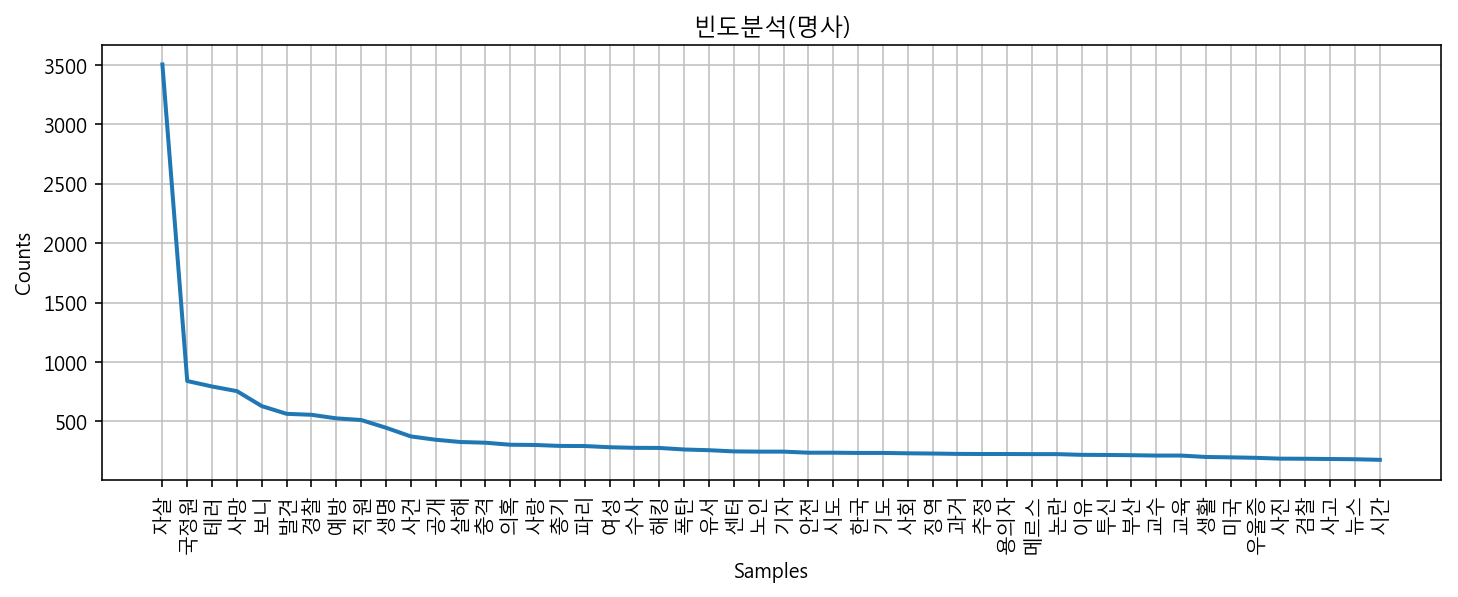

<Figure size 432x288 with 0 Axes>

In [63]:
#명사 빈도분석그래프
tokens = noun_lst
vocab = nltk.Text(tokens)
plt.figure(figsize=(12,4))
plt.title('빈도분석(명사)')
vocab.plot(50)
plt.savefig(path2+f'{keyword} 빈도분석(명사).png',transparent=True)

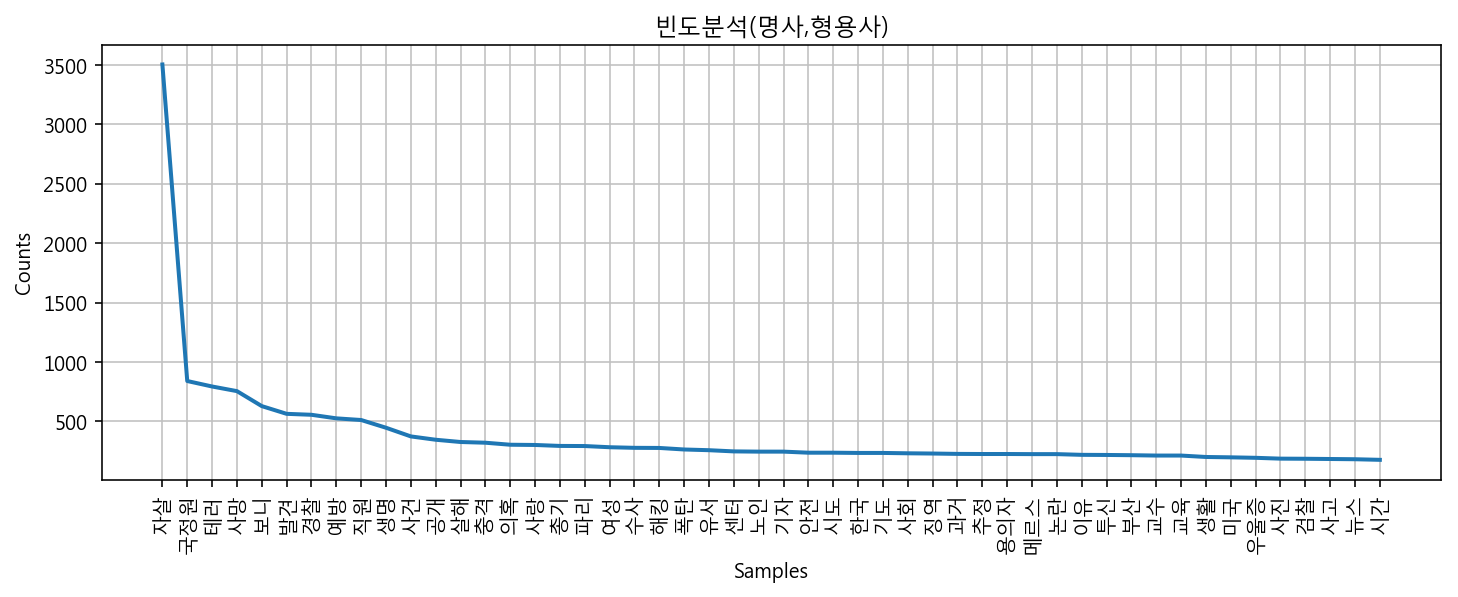

<Figure size 432x288 with 0 Axes>

In [64]:
#명사형용사 빈도분석그래프
tokens = nounadj_lst
vocab = nltk.Text(tokens)
plt.figure(figsize=(12,4))
plt.title('빈도분석(명사,형용사)')
vocab.plot(50)
plt.savefig(path2+f'{keyword}빈도분석(명사,형용사).png',transparent=False)

# 워드클라우드

In [58]:
불용어 = set(['불용어 설정'])

In [59]:
#하나의 문자열로 만든다.
text_noun = ' '.join(noun_lst)
text_nounadj = ' '.join(nounadj_lst)

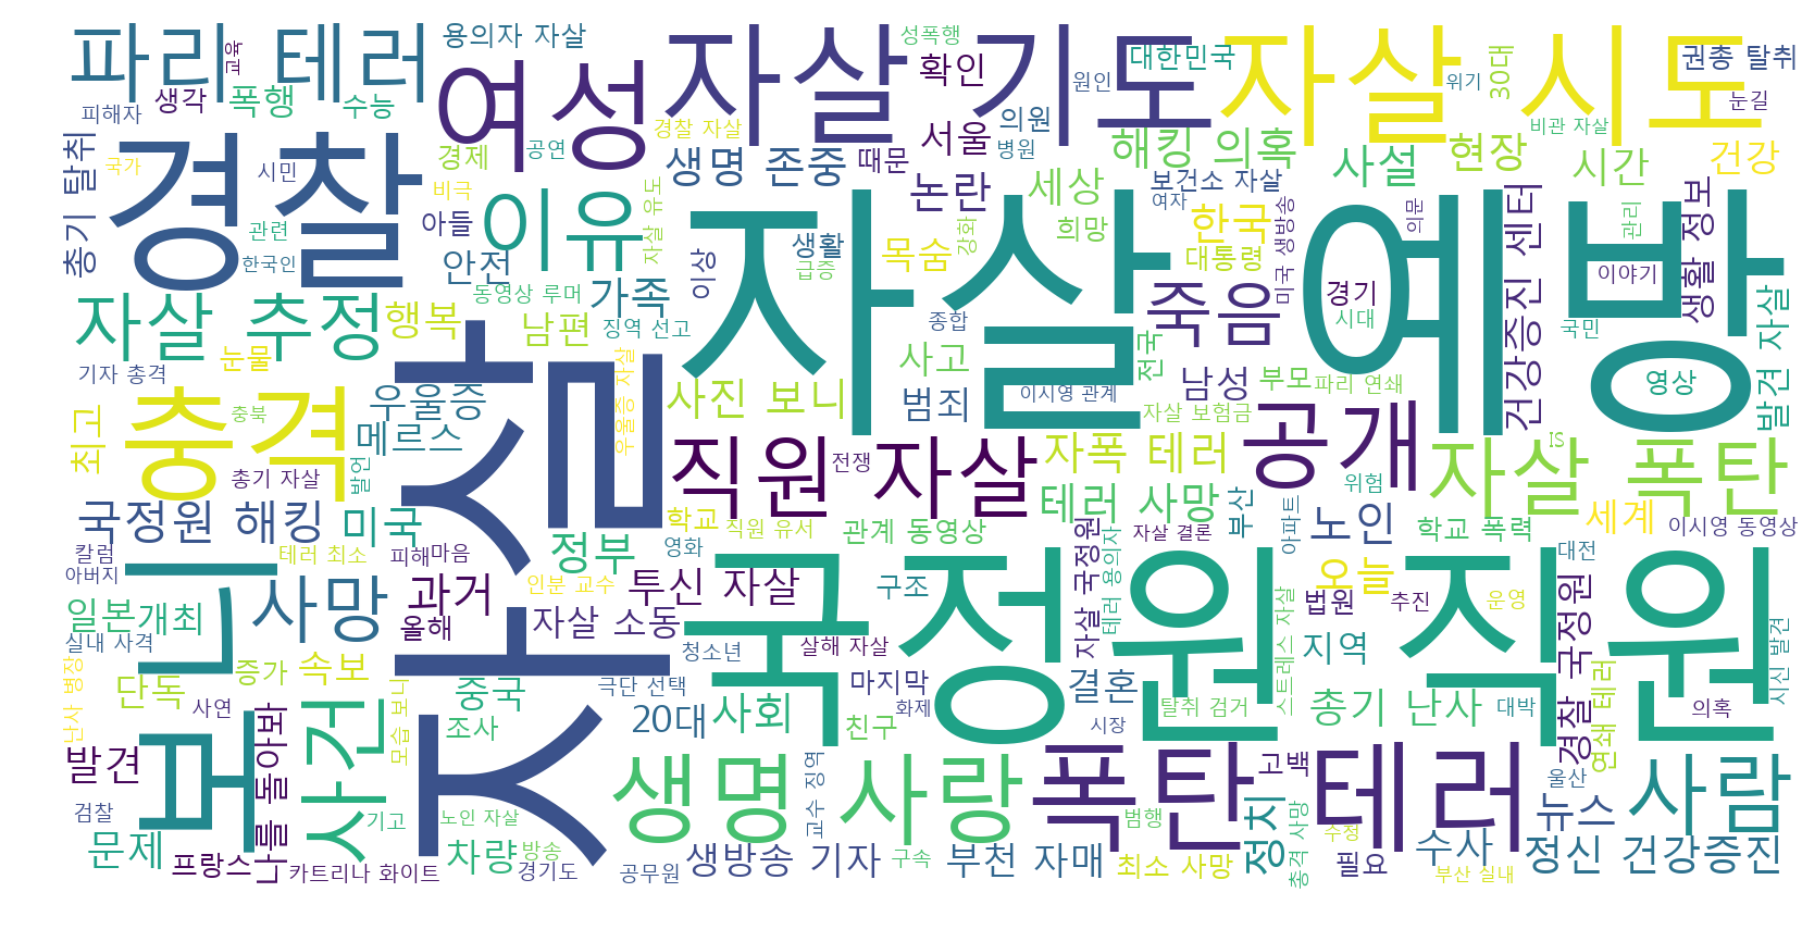

In [60]:
#워드클라우드(명사)
wordc = WordCloud(background_color='white',font_path='C:/Windows/Fonts/malgun.ttf', 
                  relative_scaling=0.5, stopwords=불용어,
                  width=1600, height=800)
wordc.generate(text_noun)
plt.figure(figsize=(16,8))
plt.imshow(wordc, interpolation = 'bilinear')
plt.axis('off')
plt.savefig(path2+'워드클라우드(명사).png',transparent=False)

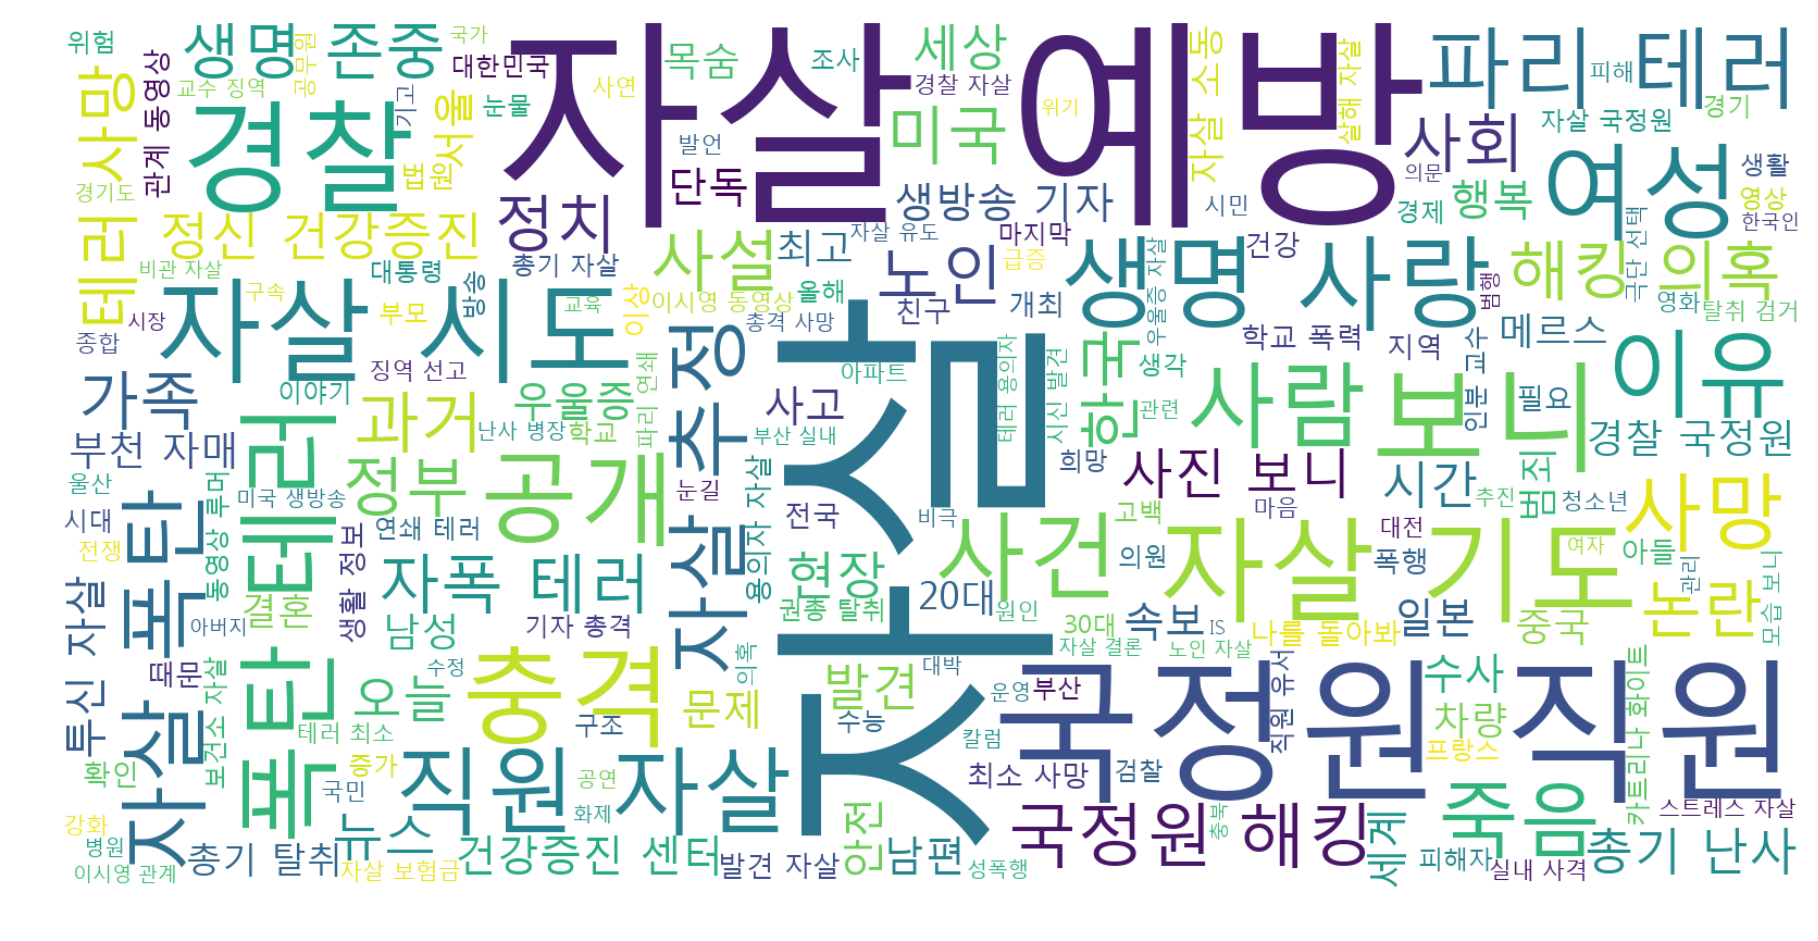

In [61]:
#워드클라우드(명사,형용사)
wordc = WordCloud(background_color='white',font_path='C:/Windows/Fonts/malgun.ttf', 
                  relative_scaling=0.5, stopwords=불용어,
                  width=1600, height=800)
wordc.generate(text_nounadj)
plt.figure(figsize=(16,8))
plt.imshow(wordc, interpolation = 'bilinear')
plt.axis('off')
plt.savefig(path2+'워드클라우드(명사,형용사).png',transparent=False)

In [62]:
# 리스트의 리스트 형식으로 만들면 연관분석 가능.
#한 제목 안에서 명사를 추출하고, 이를 리스트로 만드는 것이 필요